Data can be found here: https://www.kaggle.com/ehallmar/beers-breweries-and-beer-reviews

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
reviews = pd.read_csv('reviews.csv')

In [3]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9073128 entries, 0 to 9073127
Data columns (total 10 columns):
beer_id     int64
username    object
date        object
text        object
look        float64
smell       float64
taste       float64
feel        float64
overall     float64
score       float64
dtypes: float64(6), int64(1), object(3)
memory usage: 692.2+ MB


In [4]:
reviews.head(10)

,beer_id,username,date,text,look,smell,taste,feel,overall,score
0,271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03
1,125646,_dirty_,2017-12-21,,4.50,4.50,4.50,4.50,4.50,4.50
2,125646,CJDUBYA,2017-12-21,,4.75,4.75,4.75,4.75,4.75,4.75
3,125646,GratefulBeerGuy,2017-12-20,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58
4,125646,LukeGude,2017-12-20,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31
5,125646,jneff33,2017-12-20,,4.50,4.75,5.00,5.00,5.00,4.91
6,125646,yummybeer,2017-12-19,,4.75,4.50,4.75,4.75,4.75,4.69
7,125646,MFMB,2017-12-16,Pours a creamy opaque light straw yellow wi...,4.75,4.50,4.50,4.50,4.50,4.52
8,125646,wwoj,2017-12-16,,5.00,4.75,4.50,4.50,4.50,4.59
9,125646,Rubenjr,2017-12-14,,4.75,4.50,4.50,4.75,4.50,4.54


In [7]:
beers = pd.read_csv('beers.csv')

In [8]:
beers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358873 entries, 0 to 358872
Data columns (total 10 columns):
id              358873 non-null int64
name            358873 non-null object
brewery_id      358873 non-null int64
state           298147 non-null object
country         358719 non-null object
style           358872 non-null object
availability    358873 non-null object
abv             320076 non-null float64
notes           358827 non-null object
retired         358873 non-null object
dtypes: float64(1), int64(2), object(7)
memory usage: 27.4+ MB


In [9]:
beers.head()

,id,name,brewery_id,state,country,style,availability,abv,notes,retired
0,202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,7.3,No notes at this time.,f
1,82352,Konrads Stout Russian Imperial Stout,18604,NaN,NO,Russian Imperial Stout,Rotating,10.4,No notes at this time.,f
2,214879,Scottish Right,44306,IN,US,Scottish Ale,Year-round,4.0,No notes at this time.,t
3,320009,MegaMeow Imperial Stout,4378,WA,US,American Imperial Stout,Winter,8.7,Every time this year,f
4,246438,Peaches-N-Cream,44617,PA,US,American Cream Ale,Rotating,5.1,No notes at this time.,f


In [10]:
breweries = pd.read_csv('breweries.csv')
breweries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50347 entries, 0 to 50346
Data columns (total 7 columns):
id         50347 non-null int64
name       50347 non-null object
city       50289 non-null object
state      39076 non-null object
country    50341 non-null object
notes      50262 non-null object
types      50347 non-null object
dtypes: int64(1), object(6)
memory usage: 2.7+ MB


In [11]:
breweries.head()

,id,name,city,state,country,notes,types
0,19730,Brouwerij Danny,Erpe-Mere,NaN,BE,No notes at this time.,Brewery
1,32541,Coachella Valley Brewing Co,Thousand Palms,CA,US,No notes at this time.,"Brewery, Bar, Beer-to-go"
2,44736,Beef 'O' Brady's,Plant City,FL,US,No notes at this time.,"Bar, Eatery"
3,23372,Broadway Wine Merchant,Oklahoma City,OK,US,No notes at this time.,Store
4,35328,Brighton Beer Dispensary (DUPLICATE),Brighton,GB2,GB,Duplicate of https://www.beeradvocate.com/beer...,"Bar, Eatery"


In [12]:
# row in which value of 'Age' column is more than 30
mask = reviews.apply(lambda x: True if len(x['text'].strip()) > 0 else False , axis=1)

number_with_text_reviews = mask.sum()

print('Number of Rows in dataframe: ', len(reviews))
print('Number of Rows in dataframe with text reviews: ', number_with_text_reviews)
print('Percent of Rows in dataframe with text reviews: ', 100.0*number_with_text_reviews/len(reviews))


Number of Rows in dataframe:  9073128
Number of Rows in dataframe with text reviews:  2987991
Percent of Rows in dataframe with text reviews:  32.93231397154322


### Example Review

In [13]:
reviews.text.iloc[0]

"\xa0\xa0 750 ml bottle, 2016 vintage, bottle #304 of 360. Served in a DFH snifter, the beer pours dark brown/black with about an inch tan head that stuck around a little while. There's also a good amount of lacing. I like the aroma, the brew smells like dark fruit (raisin, plum), chocolate, roasted malt, and a bit of licorice. For the most part I think the taste is just like the aroma, but with some coffee flavor noticeable too. Mouthfeel/body is medium/full, it's creamy and coating with a moderate amount of carbonation. I think it's a good overall brew, worth picking up if you want a nice straight forward imperial stout. Here's hoping Four String brings this back in the future! $9.99 a bottle. \xa0"

## Number of reviews for each beer

In [14]:
reviews_per_beer = reviews.groupby('beer_id').count()

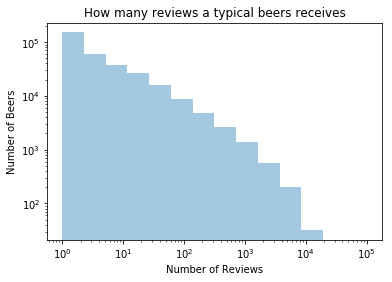

In [15]:
fig, ax = plt.subplots(1)

sns.distplot(reviews_per_beer.username.values, kde=False,
             bins=np.logspace(0,5,15),ax=ax)
#reviews.groupby('beer_id').count().username.hist(ax=ax,bins=(0,1,10,100,1000, 10000))
plt.xscale('log')
plt.xlabel('Number of Reviews')
plt.yscale('log')
plt.title('How many reviews a typical beers receives')
plt.ylabel('Number of Beers')
plt.show()

In [16]:
beer_reviews = beers.merge(reviews_per_beer.score, left_on='id', right_on='beer_id').rename(columns={'score':'n_reviews'})


In [17]:
beer_reviews.head()

,id,name,brewery_id,state,country,style,availability,abv,notes,retired,n_reviews
0,82352,Konrads Stout Russian Imperial Stout,18604,NaN,NO,Russian Imperial Stout,Rotating,10.4,No notes at this time.,f,99
1,214879,Scottish Right,44306,IN,US,Scottish Ale,Year-round,4.0,No notes at this time.,t,1
2,320009,MegaMeow Imperial Stout,4378,WA,US,American Imperial Stout,Winter,8.7,Every time this year,f,1
3,246438,Peaches-N-Cream,44617,PA,US,American Cream Ale,Rotating,5.1,No notes at this time.,f,1
4,8036,World Burp Beer 2002,3469,NaN,JP,Japanese Rice Lager,Limited (brewed once),5.5,No notes at this time.,t,1


# Most rated beers

In [18]:
beer_reviews.sort_values('n_reviews', ascending=False).head(10)

,id,name,brewery_id,state,country,style,availability,abv,notes,retired,n_reviews
137391,11757,Breakfast Stout,1199,MI,US,American Imperial Stout,Rotating,8.3,Availability: Sep - Dec,f,17160
96559,2093,90 Minute IPA,64,DE,US,American Imperial IPA,Year-round,9.0,"Esquire Magazine calls our 90 Minute IPA ""perh...",f,15947
123744,7971,Pliny The Elder,863,CA,US,American Imperial IPA,Rotating,8.0,No notes at this time.,f,14927
44381,1093,Two Hearted Ale,287,MI,US,American IPA,Year-round,7.0,Brewed with 100% Centennial hops from the Paci...,f,14915
127371,29619,Sculpin IPA,199,CA,US,American IPA,Year-round,7.0,Originally named Northstar IPA. Debuted in 2005.,f,14292
155042,16814,Heady Topper,46317,VT,US,New England IPA,Year-round,8.0,An American Double IPA. Drink from the can.,f,14282
40596,17112,Hopslam Ale,287,MI,US,American Imperial IPA,Winter,10.0,Starting with six different hop varietals adde...,f,13448
95343,19960,KBS (Kentucky Breakfast Stout),1199,MI,US,American Imperial Stout,Spring,12.3,This stout is brewed with a hint of coffee and...,f,13331
134375,10672,Bourbon County Brand Stout,1146,IL,US,American Imperial Stout,Winter,14.1,60 IBU,f,12706
22141,412,Old Rasputin,112,CA,US,Russian Imperial Stout,Year-round,9.0,Produced in the tradition of 18th Century Engl...,f,12529


# average of ratings by type of beer


In [19]:
beer_reviews.groupby('style').agg({'n_reviews':"mean",
                                 'id':'count'}).sort_values('n_reviews', ascending=False)

,n_reviews,id
style,,
Belgian Gueuze,159.280851,235
American Imperial Red Ale,104.363636,341
American Imperial Porter,92.621818,550
New England IPA,69.641480,1919
Robust Porter,69.585106,188
Belgian Fruit Lambic,66.194346,849
Russian Imperial Stout,65.193829,4019
Belgian Quadrupel (Quad),63.949040,1511
American Adjunct Lager,61.991991,1748


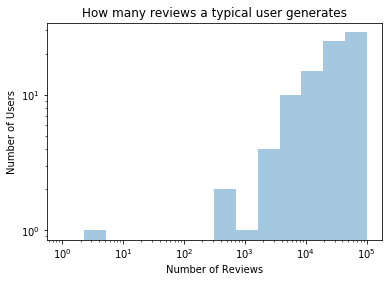

In [20]:
fig, ax = plt.subplots()

sns.distplot(beer_reviews.groupby('style').sum().n_reviews.values, kde=False,
             bins=np.logspace(0,5,15),ax=ax)
#reviews.groupby('beer_id').count().username.hist(ax=ax,bins=(0,1,10,100,1000, 10000))
plt.xscale('log')
plt.xlabel('Number of Reviews')
plt.yscale('log')
plt.title('How many reviews a typical user generates')
plt.ylabel('Number of Users')
plt.show()



## Number of reviews for each user

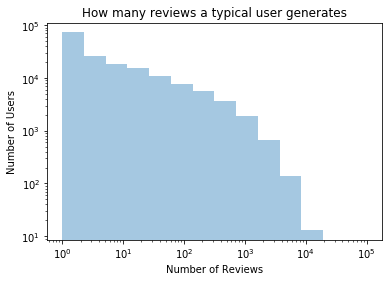

In [21]:
fig, ax = plt.subplots()

sns.distplot(reviews.groupby('username').count().text.values, kde=False,
             bins=np.logspace(0,5,15),ax=ax)
#reviews.groupby('beer_id').count().username.hist(ax=ax,bins=(0,1,10,100,1000, 10000))
plt.xscale('log')
plt.xlabel('Number of Reviews')
plt.yscale('log')
plt.title('How many reviews a typical user generates')
plt.ylabel('Number of Users')
plt.show()

## Correlations for beer reviews

In [22]:
average_reviews = reviews.dropna(axis=0).groupby('beer_id').mean()

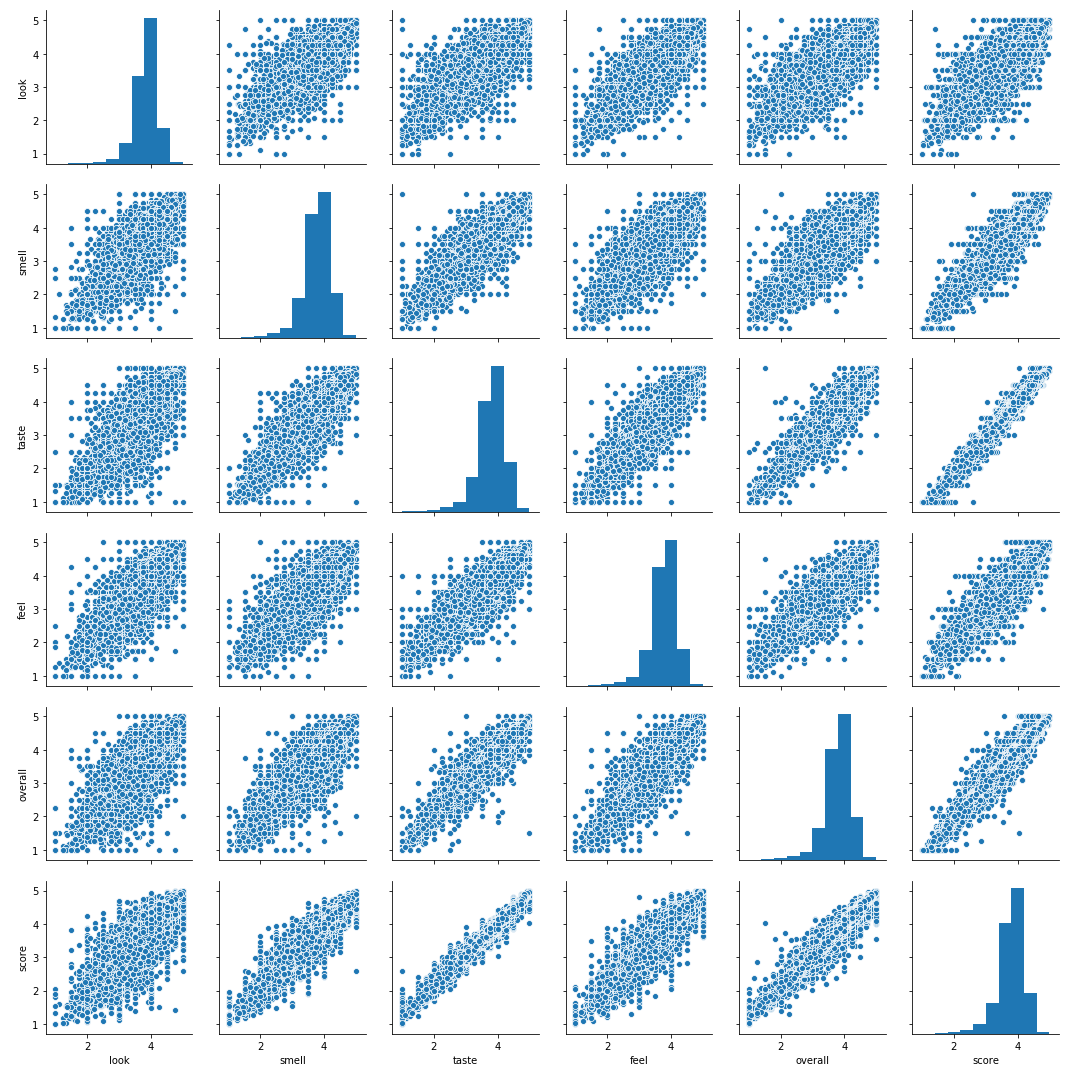

In [23]:
sns.pairplot(average_reviews)

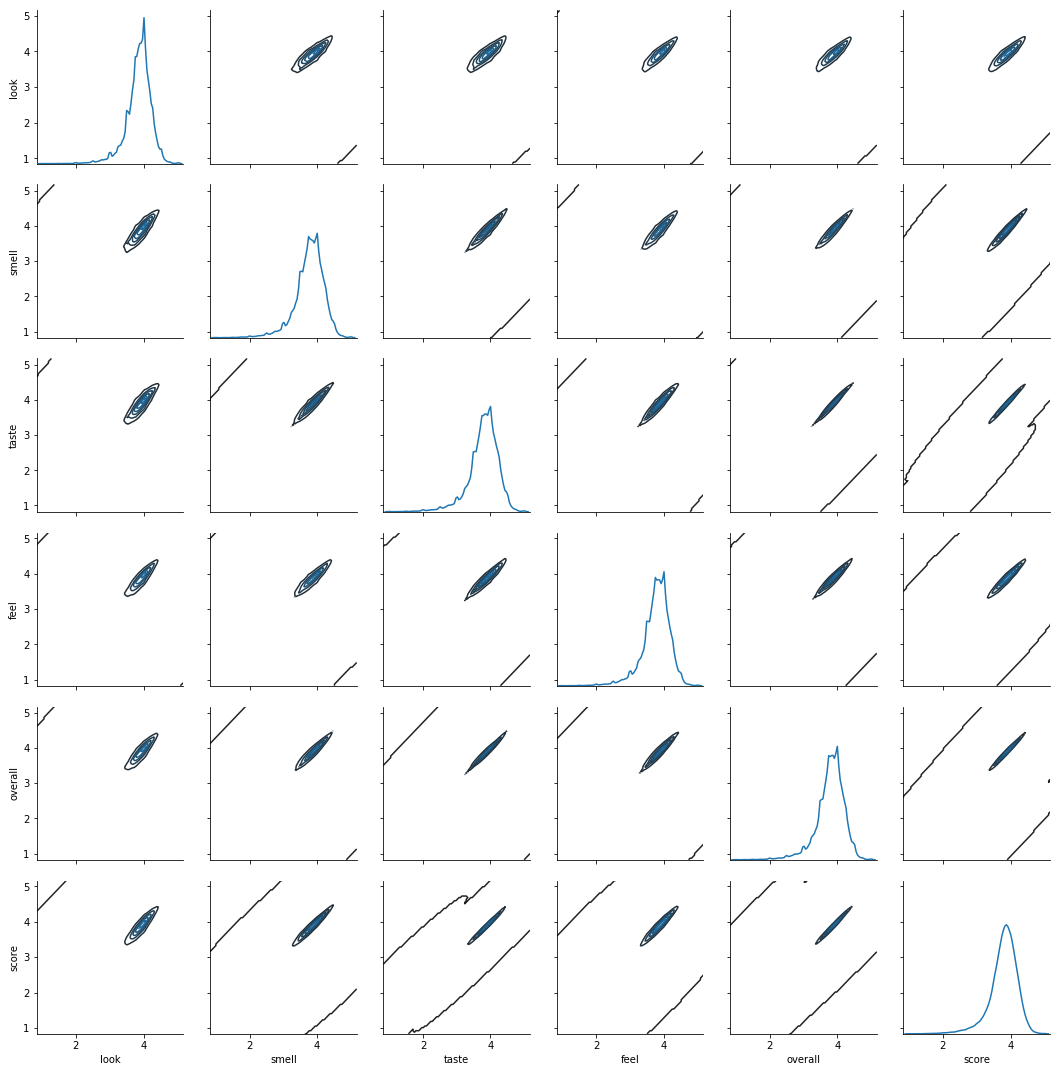

In [24]:
g = sns.PairGrid(average_reviews)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

In [25]:
average_reviews_user = reviews.dropna(axis=0).groupby('username').mean()

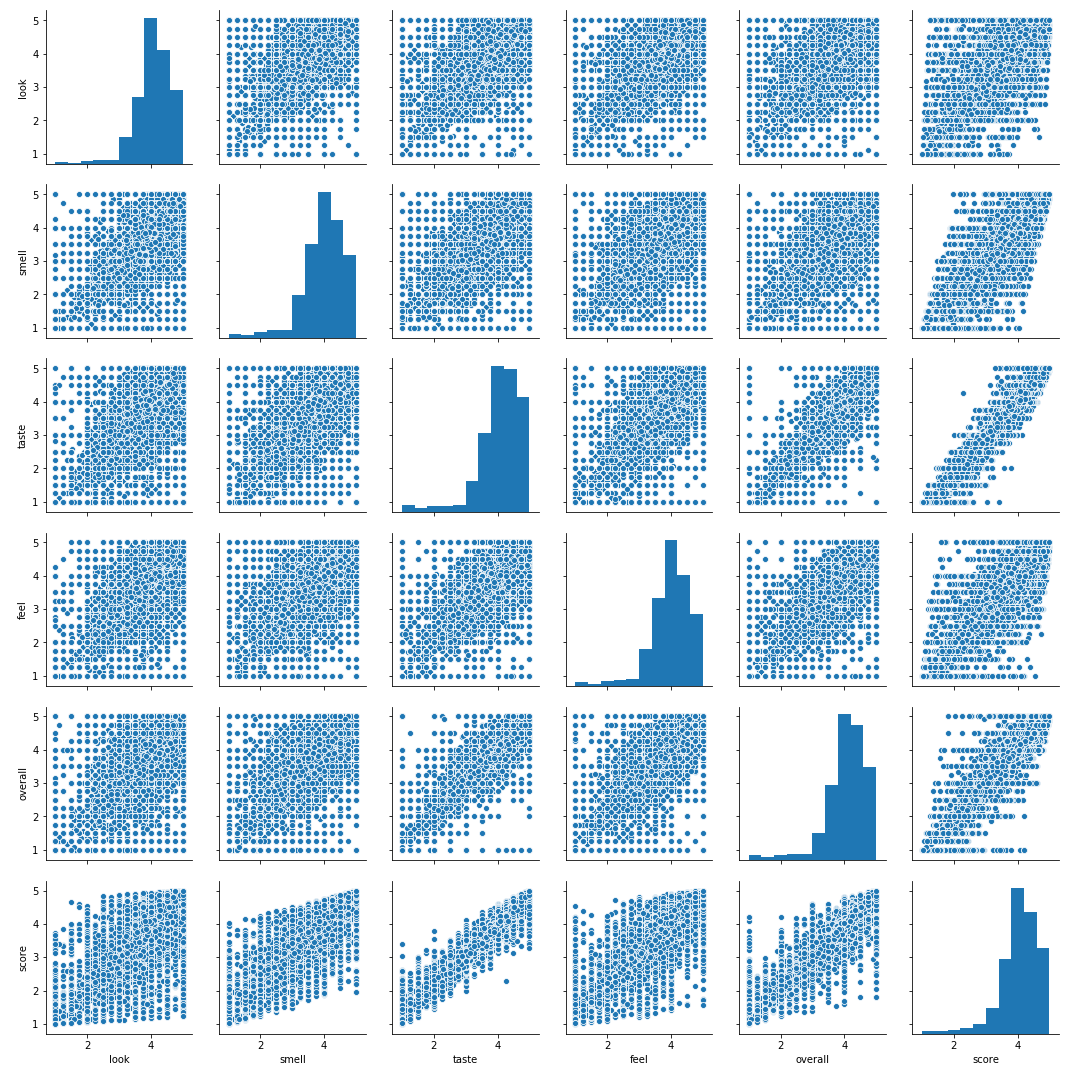

In [26]:
sns.pairplot(average_reviews_user.drop('beer_id', axis=1))

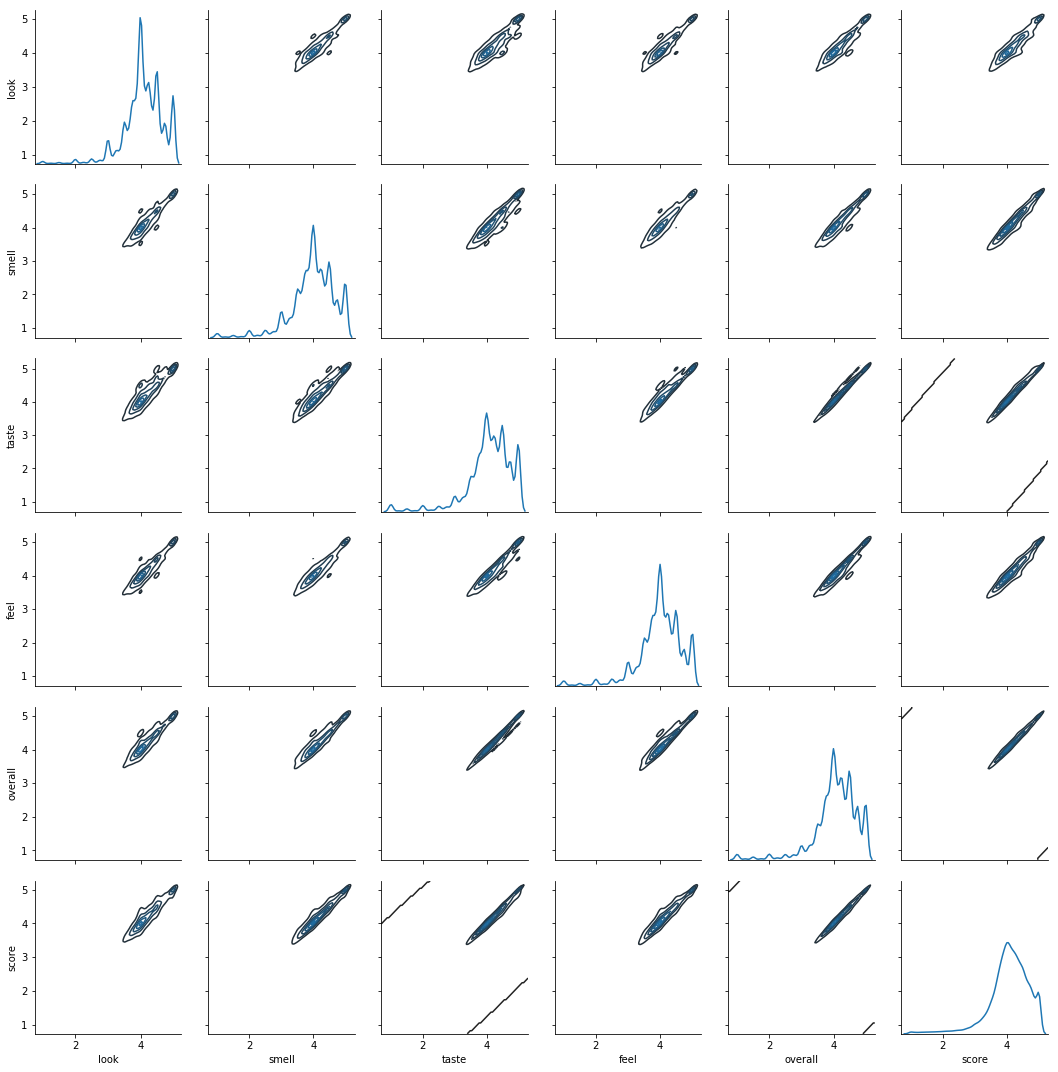

In [27]:
g = sns.PairGrid(average_reviews_user.drop('beer_id', axis=1))
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

In [28]:
reviews.head(2)

,beer_id,username,date,text,look,smell,taste,feel,overall,score
0,271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of...",4.0,4.0,4.0,4.25,4.0,4.03
1,125646,_dirty_,2017-12-21,,4.5,4.5,4.5,4.50,4.5,4.50


In [29]:
mask = reviews.apply(lambda x: True if len(x['text'].strip()) > 0 else False , axis=1)


In [30]:
reviews_with_text = reviews[mask]
reviews_with_text.head()

,beer_id,username,date,text,look,smell,taste,feel,overall,score
0,271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03
3,125646,GratefulBeerGuy,2017-12-20,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58
4,125646,LukeGude,2017-12-20,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31
7,125646,MFMB,2017-12-16,Pours a creamy opaque light straw yellow wi...,4.75,4.50,4.50,4.50,4.50,4.52
13,125646,jngrizzaffi,2017-12-10,Pours a cloudy yellow color with a thin foa...,4.50,4.50,4.50,4.75,4.50,4.53


In [31]:
beers.head(2)

,id,name,brewery_id,state,country,style,availability,abv,notes,retired
0,202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,7.3,No notes at this time.,f
1,82352,Konrads Stout Russian Imperial Stout,18604,NaN,NO,Russian Imperial Stout,Rotating,10.4,No notes at this time.,f


In [32]:
reviews_with_beer_info = reviews_with_text.merge(beers, left_on='beer_id', right_on='id')
reviews_with_beer_info.head()

,beer_id,username,date,text,look,smell,taste,feel,overall,score,id,name,brewery_id,state,country,style,availability,abv,notes,retired
0,271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03,271781,Motorbreath Imperial Stout,28094,OH,US,American Imperial Stout,Limited (brewed once),10.8,2016 - Five Year Anniversary Imperial Stout,t
1,125646,GratefulBeerGuy,2017-12-20,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58,125646,Haze,28743,MA,US,New England IPA,Rotating,8.2,We constructed this beer around hops we curren...,f
2,125646,LukeGude,2017-12-20,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31,125646,Haze,28743,MA,US,New England IPA,Rotating,8.2,We constructed this beer around hops we curren...,f
3,125646,MFMB,2017-12-16,Pours a creamy opaque light straw yellow wi...,4.75,4.50,4.50,4.50,4.50,4.52,125646,Haze,28743,MA,US,New England IPA,Rotating,8.2,We constructed this beer around hops we curren...,f
4,125646,jngrizzaffi,2017-12-10,Pours a cloudy yellow color with a thin foa...,4.50,4.50,4.50,4.75,4.50,4.53,125646,Haze,28743,MA,US,New England IPA,Rotating,8.2,We constructed this beer around hops we curren...,f
